# <center>基于机器学习的城区个人养老模式预测与分析</center>

<center>作者1, 作者2</center>

1. 工作单位
2. 工作单位

## Abstract

### Object

通过对局部人群调查量表的计算分析，明确机器学习对于城市人群养老倾向性的指导意义。

### Method

通过Tencent调查平台建立调查量表，在XXX区域发放并指导相关个人进行填写; 资料汇总后进行规范化录入保存至Excel文件，导入至Jupyter Notebook平台基于Scikit Learn机器学习工具包进行分析。

### Result

调查采集XXXX年XXXX月-xxxx年xxxx月XXX城区个体共322人，每份29个问答资料，平均年龄XXX岁，其中XXX人（xx%）选择居家养老，机器学习决策树（ENGLISH）模型调参后基于全部资料预测准确度0.90，交叉验证评分0.83;基于基本情况feature的预测准确度为0.90, 交叉验证评分0.85。对养老模式选择的影响因素前五项分别为XXX，XXX，XXX，XXX，XXX。养老的心理期待值体现为对XXX（xx%），XXX（xx%），XXX（xx%）具有强烈的意愿，与XXX相关，模型对其心理预测推断值为xxx%。

### Conclusion

城市人群的养老意愿可以对调查量表进行机器学习的方法进行预测，个人的基本情况很大程度决定了其养老倾向，这种方式有助于对局部人群养老的政策进行更科学的规划。

## Keywords

Machine Learning, Care, Aged

## Introduction

1. 什么是养老，为什么要研究养老;
2. 目前国外养老的模式是什么，有哪些优缺点;
3. 目前国内的养老模式是什么，有哪些优缺点;
4. 针对这些缺点目前有哪些方法，具体怎么操作的;
5. 为什么选择机器学习的方法，有哪些具体事项;
6. 选择机器学习研究本项目的目的是什么？

## Methods

## Result

## Discusstion

## References

In [29]:
import numpy as np
import scipy.stats as scs
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None # Show all columns
pd.options.display.max_rows = None # Show all columns

In [30]:
# Confirm data is imported properly.

data = pd.read_excel('./yanglao.xls')
data.head()

,GRP,AGE,SEX,CUL,PRO,INC,LOC,SEL,SRC,REA,WIL,PAY,CHI,REL,IHE,IAP,INU,IIN,ILO,IRE,IME,ICA,IFR,IAC,IIN.1,IST,IFA,IPO,ICI
0,4,2,2,5,2,3,1,1,1,3,1,2,2,1,1,1,1,1,1,1,1,3,3,3,3,5,5,5,1
1,3,1,2,3,1,4,3,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,5,1,2,4,4,4,3,1,2,4,3,2,2,1,2,1,2,2,1,2,1,3,1,1,1,1,2,1,1
3,3,1,2,3,5,4,5,1,2,5,1,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,3,1,1,5,1,1,5,1,1,3,1,1,3,1,2,2,2,3,2,3,1,3,2,3,2,2,1,2,2


In [31]:
from sklearn.cluster import KMeans
m = KMeans(n_clusters=3)
m.fit(data)
m.labels_

array([0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 0,
       0, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2,
       0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2,
       2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0,

In [32]:
data.astype('category').describe()

,GRP,AGE,SEX,CUL,PRO,INC,LOC,SEL,SRC,REA,WIL,PAY,CHI,REL,IHE,IAP,INU,IIN,ILO,IRE,IME,ICA,IFR,IAC,IIN.1,IST,IFA,IPO,ICI
count,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322
unique,6,5,2,5,5,5,5,3,4,5,3,6,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
top,3,1,2,5,1,4,1,1,1,4,1,0,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
freq,120,196,202,154,118,132,140,282,254,140,126,106,192,186,210,180,186,184,170,218,252,162,182,184,198,154,136,202,250


In [33]:
for col in data.columns:
    print(data[col].value_counts())
    print('*'*30)

3    120
5     68
1     58
4     34
2     26
6     16
Name: GRP, dtype: int64
******************************
1    196
3     42
2     38
4     36
5     10
Name: AGE, dtype: int64
******************************
2    202
1    120
Name: SEX, dtype: int64
******************************
5    154
3     62
4     56
2     40
1     10
Name: CUL, dtype: int64
******************************
1    118
2    112
4     36
5     32
3     24
Name: PRO, dtype: int64
******************************
4    132
3     92
2     40
5     32
1     26
Name: INC, dtype: int64
******************************
1    140
3     96
4     40
2     36
5     10
Name: LOC, dtype: int64
******************************
1    282
2     36
4      4
Name: SEL, dtype: int64
******************************
1    254
4     34
3     18
2     16
Name: SRC, dtype: int64
******************************
4    140
1    102
3     60
5     14
2      6
Name: REA, dtype: int64
******************************
1    126
2    106
3     90
Name: WIL, dtype: 

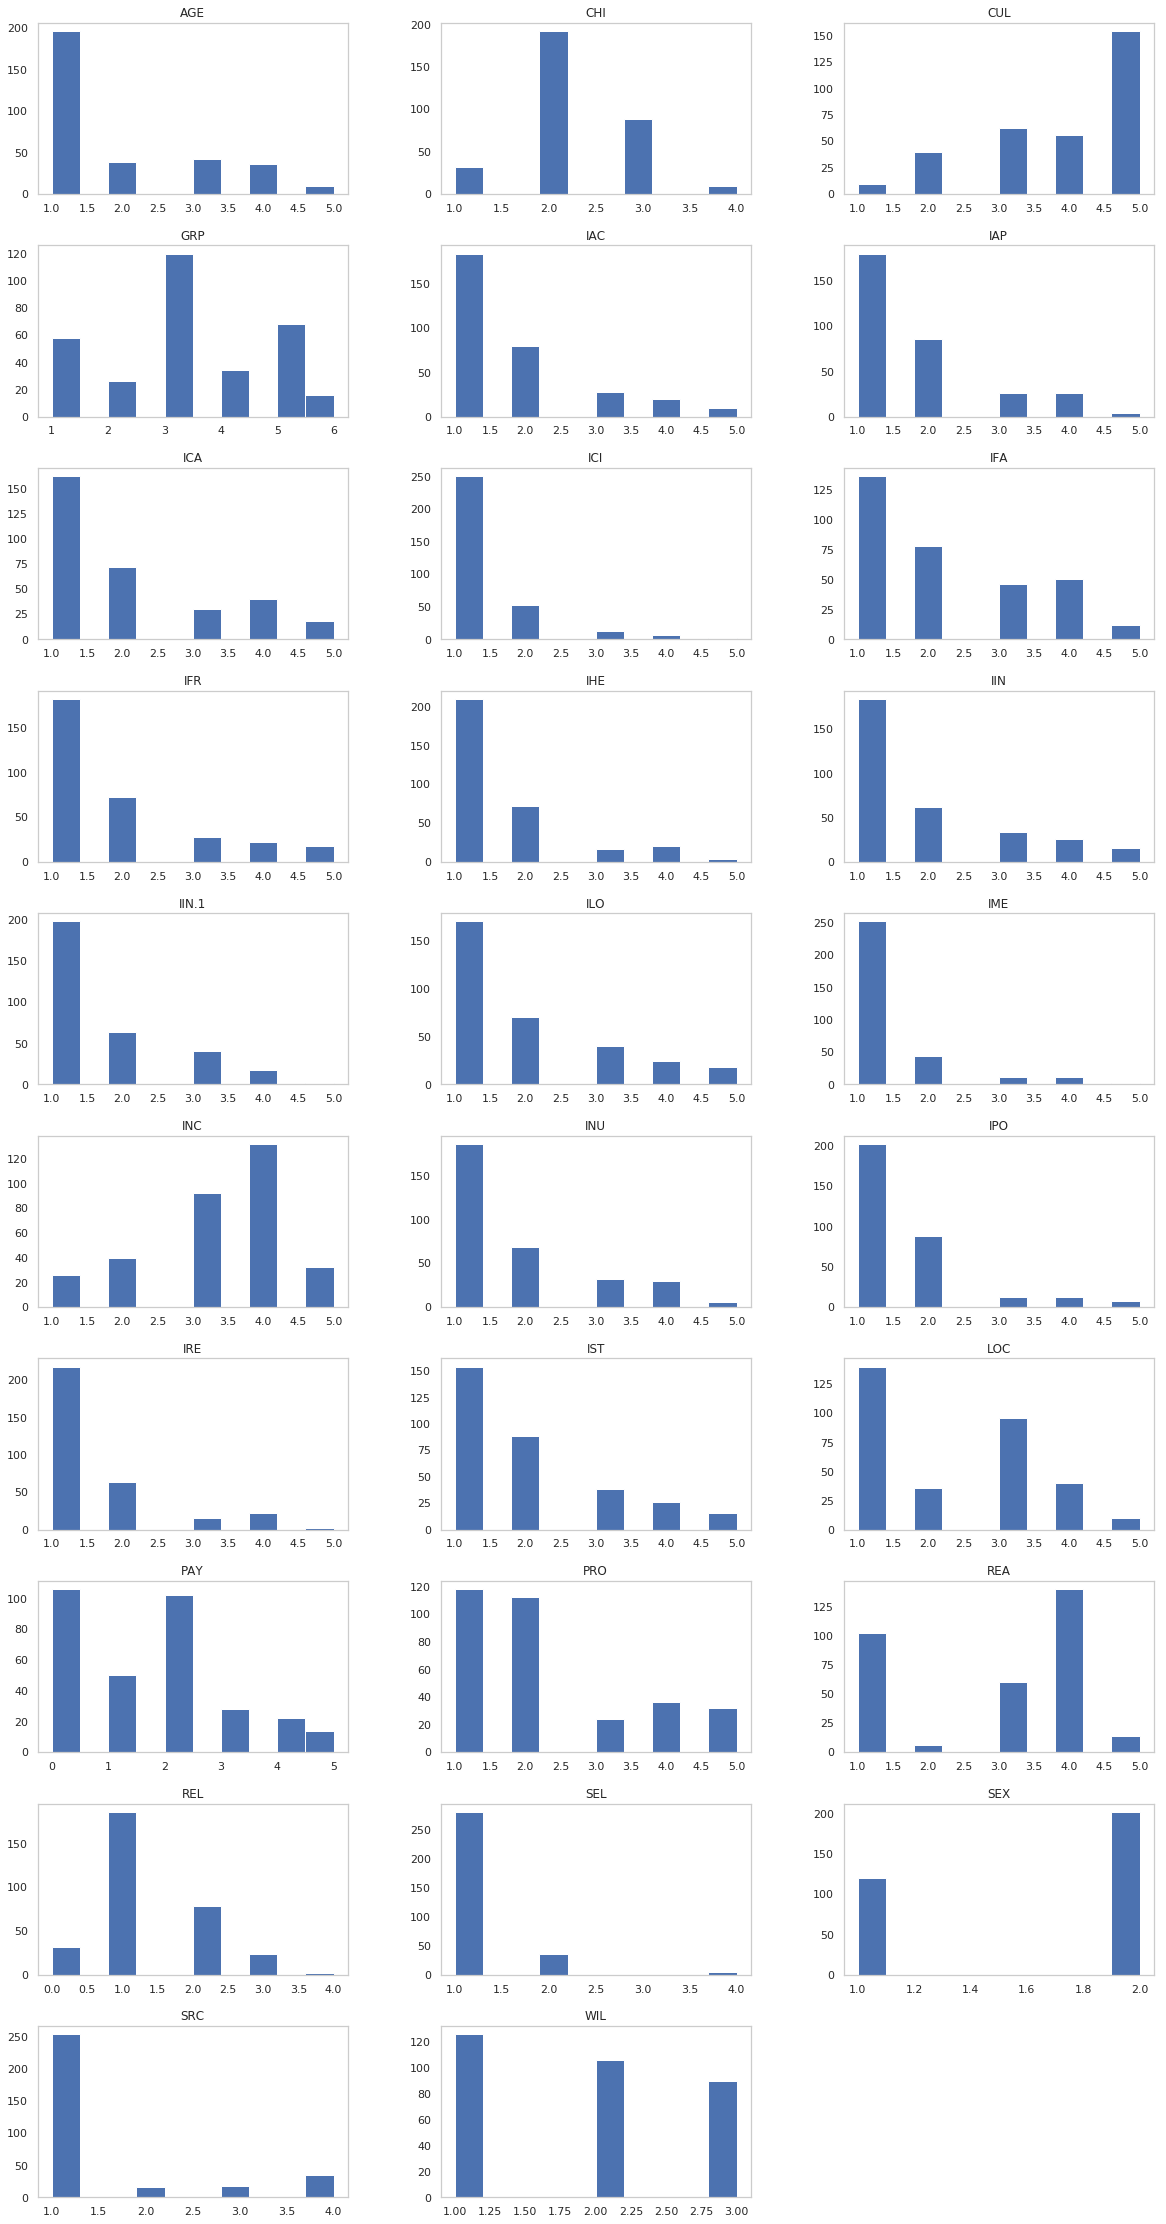

In [34]:
data.hist(grid=False, figsize=(20,40), layout=(10,3));

In [35]:
data.groupby(['IHE','IAP']).size()

IHE  IAP
1    1      158
     2       46
     3        6
2    1       14
     2       38
     3       10
     4        8
     5        2
3    1        4
     2        2
     3        6
     4        4
4    1        4
     3        2
     4       14
5    3        2
     5        2
dtype: int64

In [36]:
data_grp = data
def devide_grp(x):
    return 0 if x<4 else 1
data_grp['GRP'] = data_grp['GRP'].apply(devide_grp)
data_grp.head()

,GRP,AGE,SEX,CUL,PRO,INC,LOC,SEL,SRC,REA,WIL,PAY,CHI,REL,IHE,IAP,INU,IIN,ILO,IRE,IME,ICA,IFR,IAC,IIN.1,IST,IFA,IPO,ICI
0,1,2,2,5,2,3,1,1,1,3,1,2,2,1,1,1,1,1,1,1,1,3,3,3,3,5,5,5,1
1,0,1,2,3,1,4,3,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,2,4,4,4,3,1,2,4,3,2,2,1,2,1,2,2,1,2,1,3,1,1,1,1,2,1,1
3,0,1,2,3,5,4,5,1,2,5,1,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,1,1,5,1,1,5,1,1,3,1,1,3,1,2,2,2,3,2,3,1,3,2,3,2,2,1,2,2


In [37]:
data_grp[['CUL','GRP']].groupby('CUL').mean()

,GRP
CUL,
1,0.600000
2,0.450000
3,0.258065
4,0.428571
5,0.350649


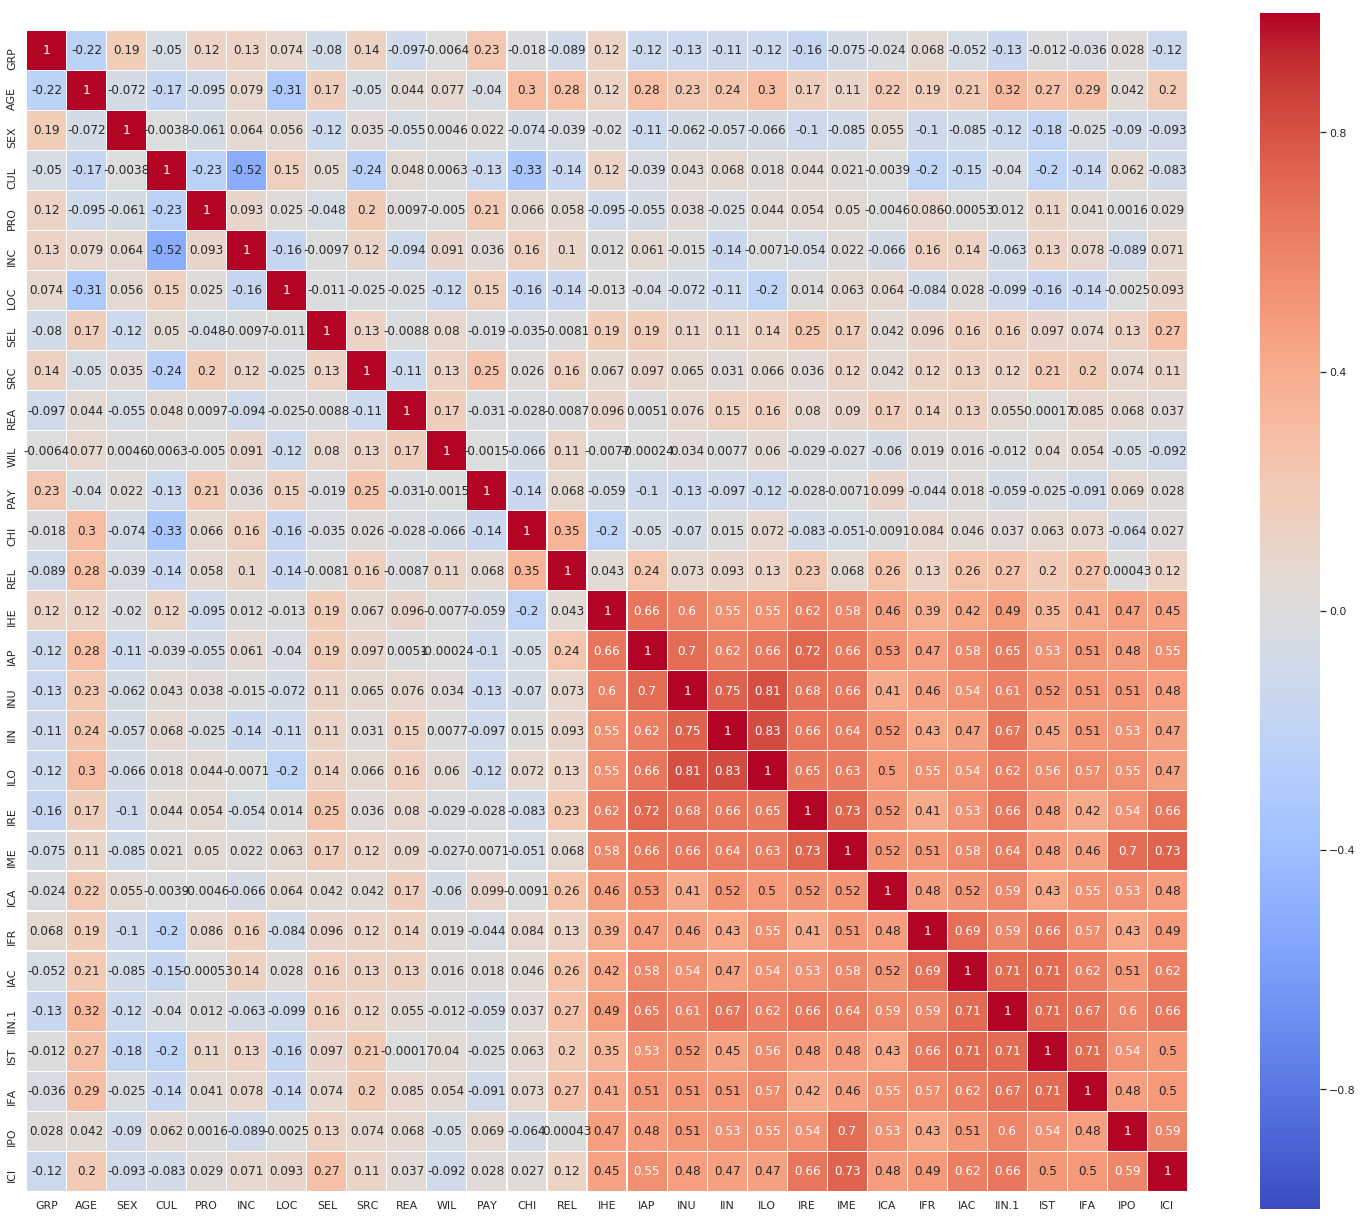

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(26, 22))
sns.heatmap(data_grp.astype(float).corr(), linewidths=0.1, square=True,
            cmap='coolwarm', linecolor='white', annot=True, vmax=1, vmin=-1);

,models,score,type
0,LR,0.72,cv
1,LR,0.63,acc
2,LDA,0.72,cv
3,LDA,0.70,acc
4,QDA,0.80,cv
5,QDA,0.75,acc
6,SVM,0.76,cv
7,SVM,0.69,acc
8,KNN,0.73,cv
9,KNN,0.59,acc


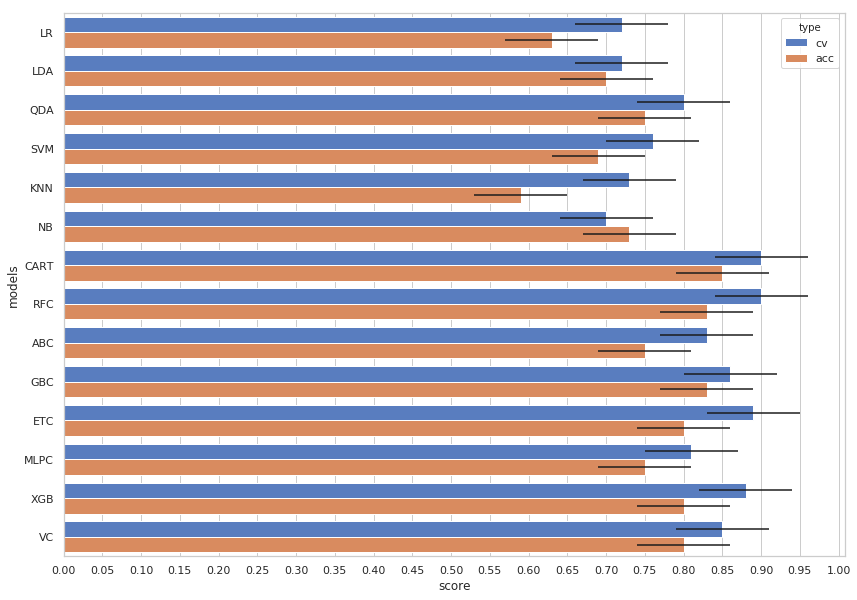

In [41]:
X, y = data_grp.values[:, 1:], data_grp.values[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# from sklearn.preprocessing import StandardScaler  
# scaler = StandardScaler()  
# # Don't cheat - fit only on training data
# scaler.fit(X_train)  
# X_train = scaler.transform(X_train)  
# # apply same transformation to test data
# X_test = scaler.transform(X_test)  

models = {
    'LR': LogisticRegression(solver='liblinear', multi_class='auto'),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'SVM': SVC(gamma='scale'),
    'KNN': KNeighborsClassifier(),
    'NB': GaussianNB(),
    'CART': DecisionTreeClassifier(),
    'RFC': RandomForestClassifier(n_estimators=100),
    'ABC': AdaBoostClassifier(),
    'GBC': GradientBoostingClassifier(),
    'ETC': ExtraTreesClassifier(n_estimators=100),
    'MLPC': MLPClassifier(),
    'XGB': XGBClassifier()
}

models['VC'] = VotingClassifier(estimators=[
    ('lr', models['LR']), ('lda', models['LDA']), ('qda', models['QDA']),
    ('svm', models['SVM']),('knn', models['KNN']), ('nb', models['NB']), 
    ('cart', models['CART']), ('rfc', models['RFC']), ('abc', models['ABC']),
    ('gbc', models['GBC']), ('etc', models['ETC']), ('mlpc', models['MLPC']),
    ('xgb', models['XGB'])], voting='hard')

kfold = StratifiedKFold(n_splits=10)
cv_result = []

for key in models:
        models[key].fit(X_train, y_train)
        cv_score = cross_val_score(
            models[key], X_train, y_train, scoring="accuracy", cv=kfold)
        cv_means = round(cv_score.mean(), 2)
        cv_std = round(cv_score.std(), 2)
        acc_score = round(models[key].score(X_test, y_test), 2)
        cvresult = {'models': key, 'score': cv_means, 'type': 'cv'}
        cv_result.append(cvresult)
        cvresult = {'models': key, 'score': acc_score, 'type': 'acc'}
        cv_result.append(cvresult)
    #     print(confusion_matrix(y_test, models[key].predict(X_test)))
    #     print(key)
    #     print('='*80)
    #     print(classification_report(y_test, models[key].predict(X_test)))
    #     print(key,'====',models[key].get_params())

cv_results = pd.DataFrame(cv_result)

plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")
# g = sns.barplot(x='score', y='models', hue='type', data=cv_results, palette="muted");
g = sns.barplot(x='score', y='models', hue='type', data=cv_results, **{'xerr': cv_std}, palette='muted')
g.set_xticks(np.arange(0, 1.05, 0.05));
cv_results

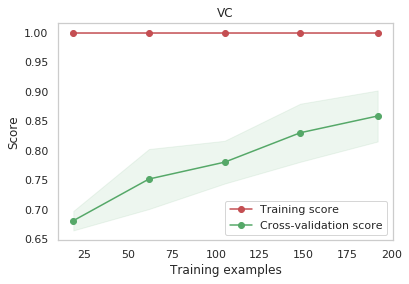

In [42]:
# Plotting Validation Curves todo

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,  color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-',
             color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-',
             color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt


# for key in models:
#     plot_learning_curve(models[key], key, X_train, y_train, cv=5)
plot_learning_curve(models['RFC'], key, X_train, y_train, cv=5);

In [43]:
key = 'RFC'
print('Confusion Matrix:')
print('='*80)
print(confusion_matrix(y_test, models[key].predict(X_test)))
print('='*80)
print('')
print('Classification Report:')
print('='*80)
print(classification_report(y_test, models[key].predict(X_test)))
print('='*80)
print('')
print('Classification Report:')
print('='*80)
print(key,'====',models[key].get_params())
print('='*80)

Confusion Matrix:
[[40  2]
 [12 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        42
           1       0.93      0.69      0.79        39

   micro avg       0.83      0.83      0.83        81
   macro avg       0.85      0.82      0.82        81
weighted avg       0.85      0.83      0.82        81


Classification Report:
RFC ==== {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


1 0.53 0.67
2 0.66 0.73
3 0.77 0.69
4 0.77 0.77
5 0.72 0.78
6 0.76 0.84
7 0.75 0.86
8 0.82 0.91
9 0.82 0.81
10 0.78 0.91
11 0.84 0.85
12 0.88 0.86
13 0.89 0.88
14 0.9 0.89
15 0.9 0.88
16 0.9 0.93
17 0.9 0.95
18 0.93 0.85
19 0.9 0.9
20 0.9 0.8
21 0.89 0.98
22 0.85 1.0
23 0.88 0.9
24 0.87 0.9
25 0.86 0.83
26 0.9 0.95
27 0.88 0.93
28 0.87 0.98


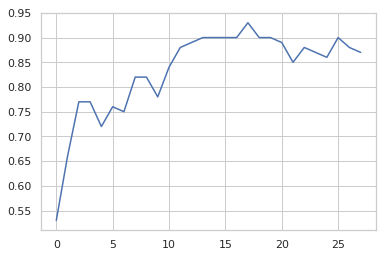

In [44]:
from sklearn.feature_selection import SelectKBest, chi2
cv_m = []
cv_acc = []
X, y = data_grp.values[:, 1:], data_grp.values[:, 0]   
for i in range(1,data.shape[1]): 
    ch2=SelectKBest(chi2, k=i)
    X_f = ch2.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_f, y)
    m_f = RandomForestClassifier(n_estimators=100)
    m_f.fit(X_train, y_train)
    cv_score = cross_val_score(m_f, X_train, y_train, scoring="accuracy", cv=kfold)
    cv_means = round(cv_score.mean(), 2)
    #     cv_std = round(cv_score.std(), 2)
    acc_score = round(m_f.score(X_test, y_test), 2)
    cv_m.append(cv_means)
    cv_acc.append(acc_score)
    print(i, cv_means, acc_score)

plt.plot(range(28), cv_m)


In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
testchi = chi2(X, y)
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X, y)
print(fit.scores_)
features = fit.transform(X)
test.get_support()
print(test.get_support())
data_grp.columns

[1.21972102e+01 1.60539374e+00 2.99913383e-01 3.71402876e+00
 1.92857192e+00 1.15760137e+00 3.63773544e-01 4.20823803e+00
 1.97983323e+00 4.61881898e-03 2.19153507e+01 2.04949965e-02
 1.15679659e+00 2.79149802e+00 2.81221438e+00 3.72016462e+00
 2.80757727e+00 3.30448050e+00 4.35282905e+00 8.11672509e-01
 1.49356883e-01 1.14855434e+00 5.55667525e-01 3.09898713e+00
 3.13115854e-02 2.93519442e-01 1.39852686e-01 1.81833274e+00]
[ True False False  True False False False  True False False  True False
 False False  True  True  True  True  True False False False False  True
 False False False False]


Index(['GRP', 'AGE', 'SEX', 'CUL', 'PRO', 'INC', 'LOC', 'SEL', 'SRC', 'REA',
       'WIL', 'PAY', 'CHI', 'REL', 'IHE', 'IAP', 'INU', 'IIN', 'ILO', 'IRE',
       'IME', 'ICA', 'IFR', 'IAC', 'IIN.1', 'IST', 'IFA', 'IPO', 'ICI'],
      dtype='object')

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100)
fit = model.fit(X, y)
print(fit.feature_importances_)

[0.06594811 0.03654861 0.04150113 0.05640339 0.05581793 0.04316452
 0.0163703  0.03278795 0.05049514 0.04656938 0.06663943 0.0446957
 0.03202917 0.04017475 0.0324255  0.02784907 0.03124131 0.02641885
 0.01901901 0.01383476 0.03505979 0.02526975 0.02188364 0.02626447
 0.0312967  0.03445908 0.02443052 0.02140202]
